# Searching For (Sub-)Structure in Disks

There is a wealth of information that is hidden in the line emission. While `GoFish` is useful for teasing our low level emission from noisy data, we can also harness the velocity structure to tease out subtle deivations in the background physical or dynamical structure.

This notebook will guide you through a few ways you can explore the data a little futher. It'll use the zeroth moment map of the CS data we've worked with in the Masking Tutorial.

In [1]:
import os
if not os.path.exists('TWHya_CS_32_M0.fits'):
    !wget -O TWHya_CS_32_M0.fits -q https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/LO2QZM/NYVZKS

## Load the Data

The first port of call is to inspect the data, so let's load it up.

In [2]:
import matplotlib.pyplot as plt
from gofish import imagecube
import numpy as np

In [3]:
cube = imagecube('TWHya_CS_32_M0.fits', FOV=10.0)

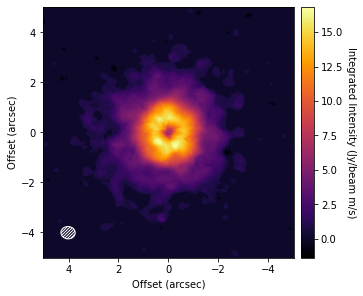

In [4]:
fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(cube.data, origin='lower', extent=cube.extent, cmap='inferno')
cb = plt.colorbar(im, pad=0.02)
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
cb.set_label('Integrated Intensity (Jy/beam m/s)', rotation=270, labelpad=13)
cube.plot_beam(ax=ax, color='w')

In [5]:
x, y, dy = cube.radial_profile(inc=5.0, PA=151.0)

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


Text(0, 0.5, 'Integrated Intensity (Jy/beam m/s)')

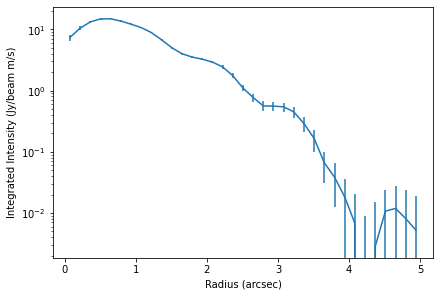

In [6]:
fig, ax = plt.subplots(constrained_layout=True)
ax.errorbar(x, y, dy)
ax.set_yscale('log')
ax.set_xlabel('Radius (arcsec)')
ax.set_ylabel('Integrated Intensity (Jy/beam m/s)')

You can clearly see bumps and wiggles associated with the gaps and rings in the system.

## Localized Deviations

One of the most exciting ideas for causing gaps and rings are embedded planets. [Cleeves et al. (2015)](https://ui.adsabs.harvard.edu/abs/2015ApJ...807....2C/abstract) suggested that a way to find these features is to subtract a mean background to reveal localized enhancements in emission which can be associated with embedded planets.

To do this, we can use the `background_residual` function. In brief, this function makes an azimuthally averaged radial profile of the data (as we have done above), then projects it onto the sky to make a mean background model which is subtracted from the data.

In [7]:
residual = cube.background_residual(inc=5.0, PA=151.0)

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


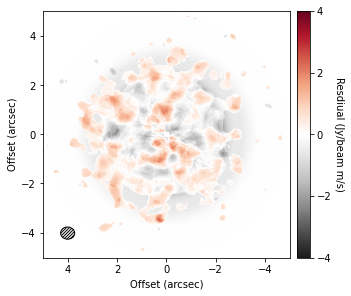

In [8]:
fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(residual, origin='lower', extent=cube.extent, cmap='RdGy_r', vmin=-4, vmax=4)
cb = plt.colorbar(im, pad=0.02, ticks=np.arange(-4, 5, 2))
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
cb.set_label('Resdiual (Jy/beam m/s)', rotation=270, labelpad=13)
cube.plot_beam(ax=ax)

Clearly this looks just looks like noise, but we'll need to try and find better data.

Regions outside the interpolation range are set to `np.nan`, however this can be changed with the inclusion of `interp1d_kw=dict(fill_value=0.0)` which will set all filled values to 0 (or any value you wish).

Sometimes it's also useful to visualize the background model too. This can be done by setting `background_only=True` in the call to `background_residual`, as so:

In [9]:
background = cube.background_residual(inc=5.0, PA=151.0, background_only=True)

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


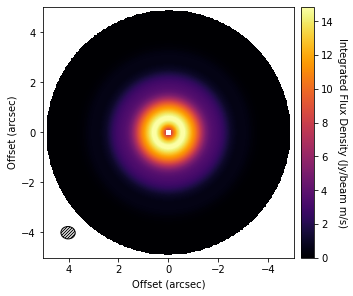

In [10]:
fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(background, origin='lower', extent=cube.extent, cmap='inferno')
cb = plt.colorbar(im, pad=0.02,)
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
cb.set_label('Integrated Flux Density (Jy/beam m/s)', rotation=270, labelpad=13)
cube.plot_beam(ax=ax)

Note that you can also include the standard `GoFish` masking properties for defining the region you wish to use to make your background model. For example, only the red-shifted side of the disk:

In [11]:
residual_mask = cube.background_residual(inc=5.0, PA=151.0, PA_min=-90.0, PA_max=90.0)

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


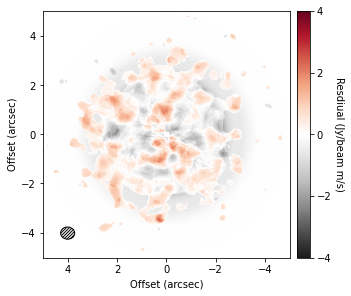

In [12]:
fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(residual, origin='lower', extent=cube.extent, cmap='RdGy_r', vmin=-4, vmax=4)
cb = plt.colorbar(im, pad=0.02, ticks=np.arange(-4, 5, 2))
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
cb.set_label('Resdiual (Jy/beam m/s)', rotation=270, labelpad=13)
cube.plot_beam(ax=ax)

However, for the broadly azimuthally symmetric TW Hya, this doesn't make a noticable difference.